# Big Data And Society - Lab 4

### Networks and Data Aggregation




### 0. Networks Overview
Real-world data can be represented through graphs. At the same time, analytical models have been developed to simulate and compare models with real-world networks, allowing us to abstract, simulate and identify specific conditions of the network in a controlled model. The understanding of the components and properties of the representation provides a useful roadmap for their use in developing their appropriate spatial representation.

In mathematics, **graphs** are used to represent **networks**. A graph represents entities that can be connected with each other through pair-like links or **edges**. The objects represented in a graph are called **nodes**, and they represent the fundamental unit of graphs . **Nodes** can have a number of properties and are indivisible. The relationships between the nodes of a graph are specified by **edges**, or connections among nodes. In more complex graph representations, edges or relationships can be **directed** or **undirected**, where the relationship is symmetric or asymmetric. Similarly edges can be **weighted** according to discrete relationships.

![IPython](images/Graph_theory_tree.jpg)

Here, the nodes are represented by numbered circles, and the edges are the undirected lines connecting them.



### Network Properties
The organization of a network can be described based on its topology, or arrangement of nodes and edges. At the same time, a number of network properties that analyze the topological conditions of the network can be described. 

The network **Degree** is the number of edges that are incident on a node. Nodes with a higher degree are more connected to other nodes, and can become network hubs. Network **Paths** are a sequence of nodes in which each node is adjacent to the next one. The shortest path between two nodes is defined as the number of edges along the shortest path connecting them. Finally, the **Clustering Coefficient** is a description of the connectedness of the neighbors of a node.

### Relationships Among Networks
When describing networks through graph relationships it is possible to construct models of isolated networks, or models that can represent relationships among different sets or spatial layers. 

**Mono-partite Networks** are the simplest network representation. All the nodes of mono-partite networks are part of the same set of information. **Road networks** can be an example of mono-partite networks, where each node is road starting point or intersection with other road. 

**Mutli-partite Networks** are networks whose nodes can be divided into multiple independent sets or sublayers of information. In this representation, nodes from different networks can be  related to each other, constructing heterogeneous relationships among its nodes. For example, if we represent a social network we could map both the relationships between users, and the social posts each user has, combining two distinct sets of nodes. 


### 1. NetworkX
[**NetworkX**](https://networkx.github.io/) is a Python library for representing graphs and networks. It contains `classes` for creating `graphs` and `digraphs`, and functions to calculate network properties such as `adjacency, degree, diameter, radius, center, betweenness`, etc. Additionally, it contains functionality for drawing **2D** and **3D** networks.

First we need to import the libraries, and some of their components. **NetworkX**, Networkx contains many algorithms for common network computations. NetworkX wraps the mathematical components of a graph into a `dictionary` like syntax, exposing **nodes** and **edges** as `dictionaries`. Dictionaries allow the inclusion of metadata along with the network topology within the network structure. To install **NetworkX** on a terminal or the command line, run the following command:
```
pip install networkx
```

We will also be using [**Seaborn**](http://stanford.edu/~mwaskom/software/seaborn/api.html). Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. It operates in a similar manner to **Matplotlib**, but creates more graphically appealing plots. 

For it to work properly, we also need to install ipywidgets. To install both, run the following commands:
```
pip install ipywidgets
pip install seaborn
```

In [3]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Seaborn
import seaborn as sns


# This allows plots to appear on the IPython notebook.
%matplotlib inline 

The basic element of networkx is a network x [**Graph**](http://networkx.readthedocs.org/en/networkx-1.11/reference/classes.graph.html#networkx.Graph)

In [4]:
# create an empty graph called G
G = nx.Graph()

### Add Nodes

Next, we want to add some nodes to our graph. In this example, we are going to create a chart of DUSP faculty and their connections.

In [7]:
# create lists of DUSP faculty names
names = ['Sarah','Jinhua','Mariana','Eran','Alan','Joe','Dennis','David','Eric','Carlo','James','Christopher']
last_names = ['Williams','Zhao','Arcaya','Ben-Joseph','Berger','Ferreira','Frenchman','Hsu','Klopfer','Ratti','Wescoat','Zegras']

# add nodes to the graph representing people
# the first argument in add_node is the name of the node (n) and you can add attributes
for i in range(len(names)):
    G.add_node(names[i], last_name=last_names[i])
G.node
# Accessing nodes and node data.
#sarah_node = G.node['Sarah']
#print("Sarah's Node: " + str(sarah_node))
#print("Sarah's Lastname: "+ sarah_node['last_name'])

{'Alan': {'last_name': 'Berger'},
 'Carlo': {'last_name': 'Ratti'},
 'Christopher': {'last_name': 'Zegras'},
 'David': {'last_name': 'Hsu'},
 'Dennis': {'last_name': 'Frenchman'},
 'Eran': {'last_name': 'Ben-Joseph'},
 'Eric': {'last_name': 'Klopfer'},
 'James': {'last_name': 'Wescoat'},
 'Jinhua': {'last_name': 'Zhao'},
 'Joe': {'last_name': 'Ferreira'},
 'Mariana': {'last_name': 'Arcaya'},
 'Sarah': {'last_name': 'Williams'}}

Take a look at Sarahs node:

In [5]:
sarah_node

{'last_name': 'Williams'}

We can add weights to nodes as well by adding another attribute to each note. This can perhaps be used to size the points in the nodes. Say we have a list of all of the weights for each faculty. We can iterate and add those to our nodes. In our iteration, we'll use the [Python zip](https://docs.python.org/3/library/functions.html#zip) function.

In [8]:
weights = [350,100,150,900,200,700,550,200,150,450,300,100]

for i,j in zip(names,weights):
    G.node[i]['weight'] = j
G.node

{'Alan': {'last_name': 'Berger', 'weight': 200},
 'Carlo': {'last_name': 'Ratti', 'weight': 450},
 'Christopher': {'last_name': 'Zegras', 'weight': 100},
 'David': {'last_name': 'Hsu', 'weight': 200},
 'Dennis': {'last_name': 'Frenchman', 'weight': 550},
 'Eran': {'last_name': 'Ben-Joseph', 'weight': 900},
 'Eric': {'last_name': 'Klopfer', 'weight': 150},
 'James': {'last_name': 'Wescoat', 'weight': 300},
 'Jinhua': {'last_name': 'Zhao', 'weight': 100},
 'Joe': {'last_name': 'Ferreira', 'weight': 700},
 'Mariana': {'last_name': 'Arcaya', 'weight': 150},
 'Sarah': {'last_name': 'Williams', 'weight': 350}}

Taking a look, we now see we've got a weight of 350 applied to the node. It is based on the location in the array.

In [9]:
sarah_node

{'last_name': 'Williams', 'weight': 350}

List our nodes:

In [7]:
# View nodes
for n in G.nodes_iter(data=True):
    print(n)

('Sarah', {'last_name': 'Williams', 'weight': 350})
('Jinhua', {'last_name': 'Zhao', 'weight': 100})
('Mariana', {'last_name': 'Arcaya', 'weight': 150})
('Eran', {'last_name': 'Ben-Joseph', 'weight': 900})
('Alan', {'last_name': 'Berger', 'weight': 200})
('Joe', {'last_name': 'Ferreira', 'weight': 700})
('Dennis', {'last_name': 'Frenchman', 'weight': 550})
('David', {'last_name': 'Hsu', 'weight': 200})
('Eric', {'last_name': 'Klopfer', 'weight': 150})
('Carlo', {'last_name': 'Ratti', 'weight': 450})
('James', {'last_name': 'Wescoat', 'weight': 300})
('Christopher', {'last_name': 'Zegras', 'weight': 100})


Adding edges among the nodes is very simple. It is also possible to create arbitrary properties on every node. We can even create a network using only edges, without even specifying the different nodes. 

In [10]:
# note that there is a lot of freedom in providing edge metadata.
# also, the relationships strengths are completely random.
G.add_edge('Sarah','Jinhua',weight=1)
G.add_edge('Sarah','Mariana',weight=2)
G.add_edge('Sarah','Eran',weight=5)
G.add_edge('Sarah','Alan',weight=7)
G.add_edge('Sarah','Joe', weight=9)
G.add_edge('Sarah','Dennis',weight=5)
G.add_edge('Sarah','David',weight=10)
G.add_edge('Sarah','Eric',weight=3)
G.add_edge('Sarah','Carlo', weight=8)
G.add_edge('Sarah','James',weight=5)

G.add_edge('Carlo','Jinhua',weight=2)
G.add_edge('Carlo','Eran',weight=10)
G.add_edge('Carlo','Joe', weight=6)
G.add_edge('Carlo','Dennis',weight=5)
G.add_edge('Carlo','David',weight=8)
G.add_edge('Carlo','Eric',weight=3)
G.add_edge('Carlo','Sarah', weight=4)
G.add_edge('Carlo','James',weight=9)
G.add_edge('Carlo','Christopher',weight=3)

G.add_edge('Joe','Jinhua',weight=2)
G.add_edge('Joe','Mariana',weight=4)
G.add_edge('Joe','Eran',weight=2)
G.add_edge('Joe','Dennis',weight=5)
G.add_edge('Joe','David',weight=3)
G.add_edge('Joe','Eric',weight=1)
G.add_edge('Joe','Sarah', weight=5)
G.add_edge('Joe','Carlo',weight=2)
G.add_edge('Joe','Christopher',weight=9)

print("Sarah-Alan edge: "+str(G['Sarah']['Alan']))

Sarah-Alan edge: {'weight': 7}


In [11]:
# View the number of edges
G.number_of_edges()

25

In [12]:
# Retrieve the edges as a list
G.edges()

[('Sarah', 'Jinhua'),
 ('Sarah', 'Mariana'),
 ('Sarah', 'Eran'),
 ('Sarah', 'Alan'),
 ('Sarah', 'Joe'),
 ('Sarah', 'Dennis'),
 ('Sarah', 'David'),
 ('Sarah', 'Eric'),
 ('Sarah', 'Carlo'),
 ('Sarah', 'James'),
 ('Jinhua', 'Carlo'),
 ('Jinhua', 'Joe'),
 ('Mariana', 'Joe'),
 ('Eran', 'Carlo'),
 ('Eran', 'Joe'),
 ('Joe', 'Carlo'),
 ('Joe', 'Dennis'),
 ('Joe', 'David'),
 ('Joe', 'Eric'),
 ('Joe', 'Christopher'),
 ('Dennis', 'Carlo'),
 ('David', 'Carlo'),
 ('Eric', 'Carlo'),
 ('Carlo', 'James'),
 ('Carlo', 'Christopher')]

In [13]:
# View connections
G.neighbors('Christopher')

['Carlo', 'Joe']

Of course, you probably won't add nodes and edges manually, but you can envision here how to load them.

In [14]:
# Add more faculty (nodes)
additional_names = ['Justin','Phil']
additional_last_names = ['Steil','Thompson']
additional_weights = [40,50]

for i in range(len(additional_names)):
    G.add_node(additional_names[i], last_name=additional_last_names[i], weight=additional_weights[i])

In [15]:
# View nodes
for n in G.nodes_iter(data=True):
    print(n)

('Sarah', {'last_name': 'Williams', 'weight': 350})
('Jinhua', {'last_name': 'Zhao', 'weight': 100})
('Mariana', {'last_name': 'Arcaya', 'weight': 150})
('Eran', {'last_name': 'Ben-Joseph', 'weight': 900})
('Alan', {'last_name': 'Berger', 'weight': 200})
('Joe', {'last_name': 'Ferreira', 'weight': 700})
('Dennis', {'last_name': 'Frenchman', 'weight': 550})
('David', {'last_name': 'Hsu', 'weight': 200})
('Eric', {'last_name': 'Klopfer', 'weight': 150})
('Carlo', {'last_name': 'Ratti', 'weight': 450})
('James', {'last_name': 'Wescoat', 'weight': 300})
('Christopher', {'last_name': 'Zegras', 'weight': 100})
('Justin', {'last_name': 'Steil', 'weight': 40})
('Phil', {'last_name': 'Thompson', 'weight': 50})


In [16]:
# Add more edges
more_faculty_relationships = [['Justin','Mariana',15],
                            ['Joe','Phil',6],
                            ['Joe','Justin',8],
                            ['Phil','Christopher',5]]

for i in more_faculty_relationships:
    G.add_edge(i[0],i[1],weight=i[2])

In [17]:
# View edges
for n in G.edges_iter(data=True):
    print(n)

('Sarah', 'Jinhua', {'weight': 1})
('Sarah', 'Mariana', {'weight': 2})
('Sarah', 'Eran', {'weight': 5})
('Sarah', 'Alan', {'weight': 7})
('Sarah', 'Joe', {'weight': 5})
('Sarah', 'Dennis', {'weight': 5})
('Sarah', 'David', {'weight': 10})
('Sarah', 'Eric', {'weight': 3})
('Sarah', 'Carlo', {'weight': 4})
('Sarah', 'James', {'weight': 5})
('Jinhua', 'Carlo', {'weight': 2})
('Jinhua', 'Joe', {'weight': 2})
('Mariana', 'Joe', {'weight': 4})
('Mariana', 'Justin', {'weight': 15})
('Eran', 'Carlo', {'weight': 10})
('Eran', 'Joe', {'weight': 2})
('Joe', 'Carlo', {'weight': 2})
('Joe', 'Dennis', {'weight': 5})
('Joe', 'David', {'weight': 3})
('Joe', 'Eric', {'weight': 1})
('Joe', 'Christopher', {'weight': 9})
('Joe', 'Phil', {'weight': 6})
('Joe', 'Justin', {'weight': 8})
('Dennis', 'Carlo', {'weight': 5})
('David', 'Carlo', {'weight': 8})
('Eric', 'Carlo', {'weight': 3})
('Carlo', 'James', {'weight': 9})
('Carlo', 'Christopher', {'weight': 3})
('Christopher', 'Phil', {'weight': 5})


### Drawing the Graph

The primary purpose of NetworkX is not actually plots, it is designed for network logic (you will probably want to use D3js once we get our networks made for visualization!), however it does use matplotlib's functions to create its plots. It has built a wrapper around matplotlib's api. We can still control some specifics of the plot, like the figure size, using matplotlib's functions.

We will be working with networkx's [**draw API**](http://networkx.readthedocs.org/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw). When drawing networks, we can provide the position of the nodes ourselves, or we can use some of the [**built-in layouts**](http://networkx.readthedocs.org/en/networkx-1.11/reference/drawing.html#module-networkx.drawing.layout).

#### 1. Get Node Sizes and Edge Widths

We need two arrays, one for edge widths, and one for node sizes. Let's set those up.

In [18]:
# Get a list of weights
weights=nx.get_node_attributes(G,'weight')
weights_list=list(weights.values())
weights_list

[350, 100, 150, 900, 200, 700, 550, 200, 150, 450, 300, 100, 40, 50]

In [19]:
# Get a list of edge widths for relationship strength
width=nx.get_edge_attributes(G,'weight')
width_list=list(width.values())
width_list

[1,
 2,
 5,
 7,
 5,
 5,
 10,
 3,
 4,
 5,
 2,
 2,
 4,
 15,
 10,
 2,
 2,
 5,
 3,
 1,
 9,
 6,
 8,
 5,
 8,
 3,
 9,
 3,
 5]

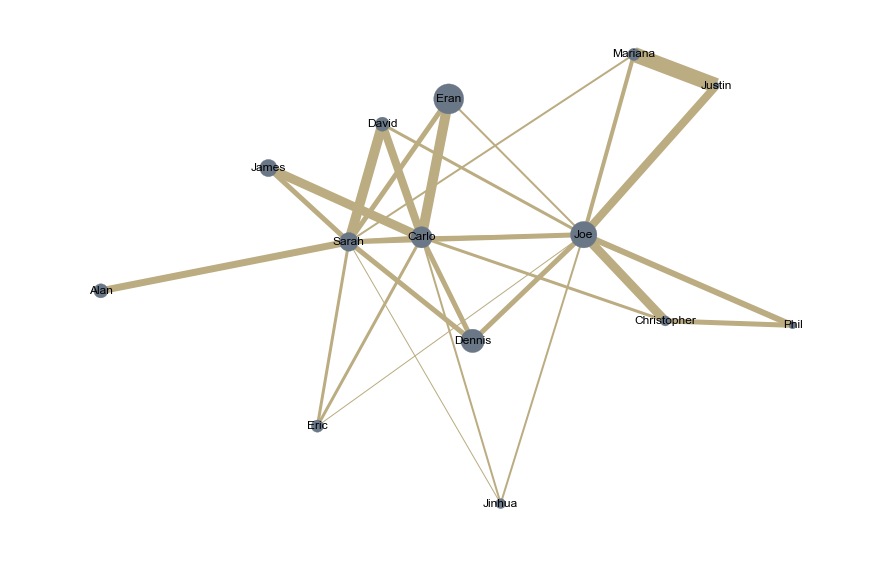

In [20]:
plt.figure(figsize=(15,10));

pos=nx.spring_layout(G) # positions for all nodes, try circular_layout, fruchterman_reingold_layout, or spectral_layout

# nodes
nx.draw_networkx_nodes(G, pos, node_size=weights_list, node_color="#6a7787")

# edges
nx.draw_networkx_edges(G, pos, width=width_list, edge_color='#bbac81')

# labels
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

Accessing different network properties is very simple. Additionaly, NetworkX implements a number of network analysis algorithms such as centrality. The **degree distribution** is a 'thumb-print' that allows us to understand the structure and dynamics of a networked system.

In [21]:
degrees = nx.degree(G)
print("All degrees: "+str(degrees))
print(degrees['Alan'])
print("Number of faculty one degree from Mariana: "+str(G.degree('Mariana')))
D = list(degrees.values())

All degrees: {'Sarah': 10, 'Jinhua': 3, 'Mariana': 3, 'Eran': 3, 'Alan': 1, 'Joe': 11, 'Dennis': 3, 'David': 3, 'Eric': 3, 'Carlo': 9, 'James': 2, 'Christopher': 3, 'Justin': 2, 'Phil': 2}
1
Number of faculty one degree from Mariana: 3


**NetworkX** has a number of plotting functions built-in. Apart from drawing nodes and edges, a number of the objects returned by the network functions are `numpy.arrays`, `dicts` or `lists` that can be easily passed to a **Matplotlib** function to represent them. While we are still using matplotlib to create the plots, we can use seaborn (sns) to improve the graphic style of the plots. By setting the [**style**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.set_style.html) of the plot, we have a choice to use some of seaborn's available style's. 

[10, 3, 3, 3, 1, 11, 3, 3, 3, 9, 2, 3, 2, 2]


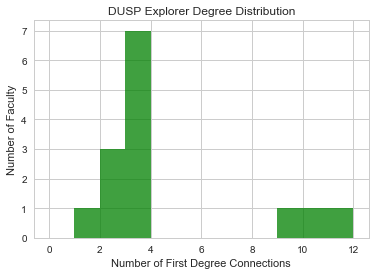

In [22]:
sns.set_style("whitegrid")
plt.figure()
print(D)

# We will be plotting the Degrees, that we stored in variable D
plt.hist(D,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12], facecolor='green', alpha=0.75)
plt.xlabel('Number of First Degree Connections')
plt.ylabel('Number of Faculty')
plt.title('DUSP Explorer Degree Distribution')
# Answer:
# As n gets large, degree dist is a Poisson distribution.
plt.show()